# Bienvenidos, en este Notebook realizaremos una predicción del precio en UF del dataset Valor Casas Usadas, Chile, RM utilizando regresión lineal.

In [1]:
#Importamos las librerias a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Como primer paso, importamos el archivo csv a la variable df

df = pd.read_csv('/kaggle/input/valor-casas-usadas-chile-rm-08032023/2023-07-18 Propiedades Web Scrape.csv')
df.head()

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
0,129884400,3600.0,158396.0,Lampa,AvenidaLaHacienda,3.0,2.0,68.0,221.0,1.0,7850612,Behouse
1,130000000,3603.0,158537.0,Buin,Villaseca,5.0,3.0,150.0,190.0,2.0,10081485,NaN
2,172998805,4795.0,210974.0,PuenteAlto,BarrioAustria,4.0,3.0,90.0,182.0,3.0,10257247,Bissac
3,135296250,3750.0,164995.0,Buin,ComercianteArmandoPérezCarrasco,3.0,2.0,85.0,175.0,1.0,20153043,Ambiento Propiedades
4,195000000,5405.0,237805.0,QuintaNormal,Hostos,3.0,3.0,130.0,402.0,1.0,16669338,Puntoinmobiliario.cl


## Comenzamos un EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   9291 non-null   int64  
 1   Price_UF    9291 non-null   float64
 2   Price_USD   9291 non-null   float64
 3   Comuna      9291 non-null   object 
 4   Ubicacion   9291 non-null   object 
 5   Dorms       9202 non-null   float64
 6   Baths       9138 non-null   float64
 7   Built Area  9013 non-null   float64
 8   Total Area  9057 non-null   float64
 9   Parking     6371 non-null   float64
 10  id          9291 non-null   int64  
 11  Realtor     8125 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 871.2+ KB


* Nos damos cuenta que el total de entradas es 9291, sin embargo hay variables que contienen menos datos, lo que nos indica que hay valores nulos.

In [4]:
df.isna().sum()

Price_CLP        0
Price_UF         0
Price_USD        0
Comuna           0
Ubicacion        0
Dorms           89
Baths          153
Built Area     278
Total Area     234
Parking       2920
id               0
Realtor       1166
dtype: int64

In [5]:
# Eliminamos filas con valores nulos ya que no tenemos como recuperar estos.
df.dropna(axis=0, inplace=True)
df.isna().sum()

Price_CLP     0
Price_UF      0
Price_USD     0
Comuna        0
Ubicacion     0
Dorms         0
Baths         0
Built Area    0
Total Area    0
Parking       0
id            0
Realtor       0
dtype: int64

In [6]:
#Como medida de seguridad, eliminalos las filas duplicadas.

df = df.drop_duplicates()

In [7]:
# Al observar el df, sabemos que columnas no nos sirven, procedemos a dropearlas.

df.drop(['Price_CLP', 'Price_USD','Ubicacion','id', 'Realtor'], axis=1, inplace=True)

In [8]:
# Reseteamos el índice

df.reset_index(drop=True, inplace=True)
df.head()

,Price_UF,Comuna,Dorms,Baths,Built Area,Total Area,Parking
0,3600.0,Lampa,3.0,2.0,68.0,221.0,1.0
1,4795.0,PuenteAlto,4.0,3.0,90.0,182.0,3.0
2,3750.0,Buin,3.0,2.0,85.0,175.0,1.0
3,5405.0,QuintaNormal,3.0,3.0,130.0,402.0,1.0
4,4000.0,Peñaflor,3.0,3.0,84.0,180.0,3.0


In [9]:
# Nos aseguramos de que la misma comuna no esta repetida escrita de otra manera

unique_comunas = df['Comuna'].unique()
unique_comunas.sort()
unique_comunas

array(['Buin', 'CaleradeTango', 'Cerrillos', 'CerroNavia', 'Colina',
       'Conchalí', 'Curacaví', 'ElBosque', 'ElMonte', 'EstaciónCentral',
       'Huechuraba', 'Independencia', 'IsladeMaipo', 'LaCisterna',
       'LaFlorida', 'LaGranja', 'LaPintana', 'LaReina', 'Lampa',
       'LasCondes', 'LoBarnechea', 'LoEspejo', 'LoPrado', 'Macul',
       'Maipú', 'MaríaPinto', 'Melipilla', 'PadreHurtado', 'Paine',
       'PedroAguirreCerda', 'Peñaflor', 'Peñalolén', 'Pirque',
       'Providencia', 'Pudahuel', 'PuenteAlto', 'Quilicura',
       'QuintaNormal', 'Recoleta', 'Renca', 'SanBernardo', 'SanJoaquín',
       'SanJosédeMaipo', 'SanMiguel', 'SanRamón', 'Santiago', 'Talagante',
       'Tiltil', 'Vitacura', 'Ñuñoa'], dtype=object)

## Correlación

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5509 entries, 0 to 5508
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_UF    5509 non-null   float64
 1   Comuna      5509 non-null   object 
 2   Dorms       5509 non-null   float64
 3   Baths       5509 non-null   float64
 4   Built Area  5509 non-null   float64
 5   Total Area  5509 non-null   float64
 6   Parking     5509 non-null   float64
dtypes: float64(6), object(1)
memory usage: 301.4+ KB


In [11]:
correlacion = df.drop(columns=['Comuna']).corr()
correlacion

,Price_UF,Dorms,Baths,Built Area,Total Area,Parking
Price_UF,1.000000,0.444612,0.674913,-0.002415,0.064695,0.539803
Dorms,0.444612,1.000000,0.635809,0.020692,0.036234,0.327315
Baths,0.674913,0.635809,1.000000,0.003088,0.039452,0.436687
Built Area,-0.002415,0.020692,0.003088,1.000000,0.023991,0.015258
Total Area,0.064695,0.036234,0.039452,0.023991,1.000000,0.068989
Parking,0.539803,0.327315,0.436687,0.015258,0.068989,1.000000


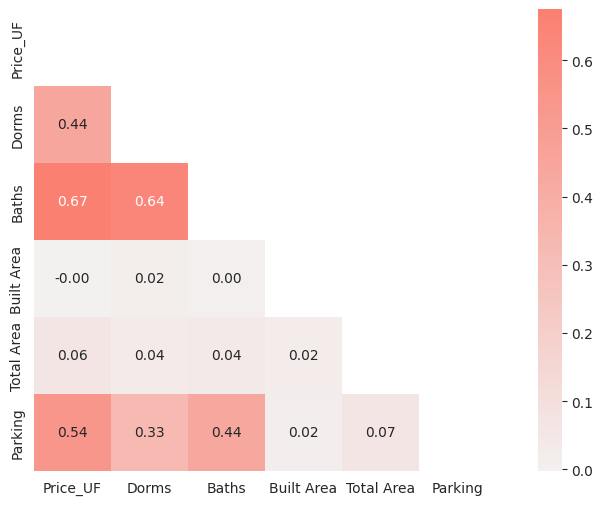

In [12]:
colores = sns.light_palette('salmon', as_cmap=True)
mask = np.triu(correlacion)

with sns.axes_style("white"):
    plt.figure(figsize=(11, 6))
    sns.heatmap(correlacion, cmap=colores, mask=mask, square=True, annot=True, fmt='.2f')


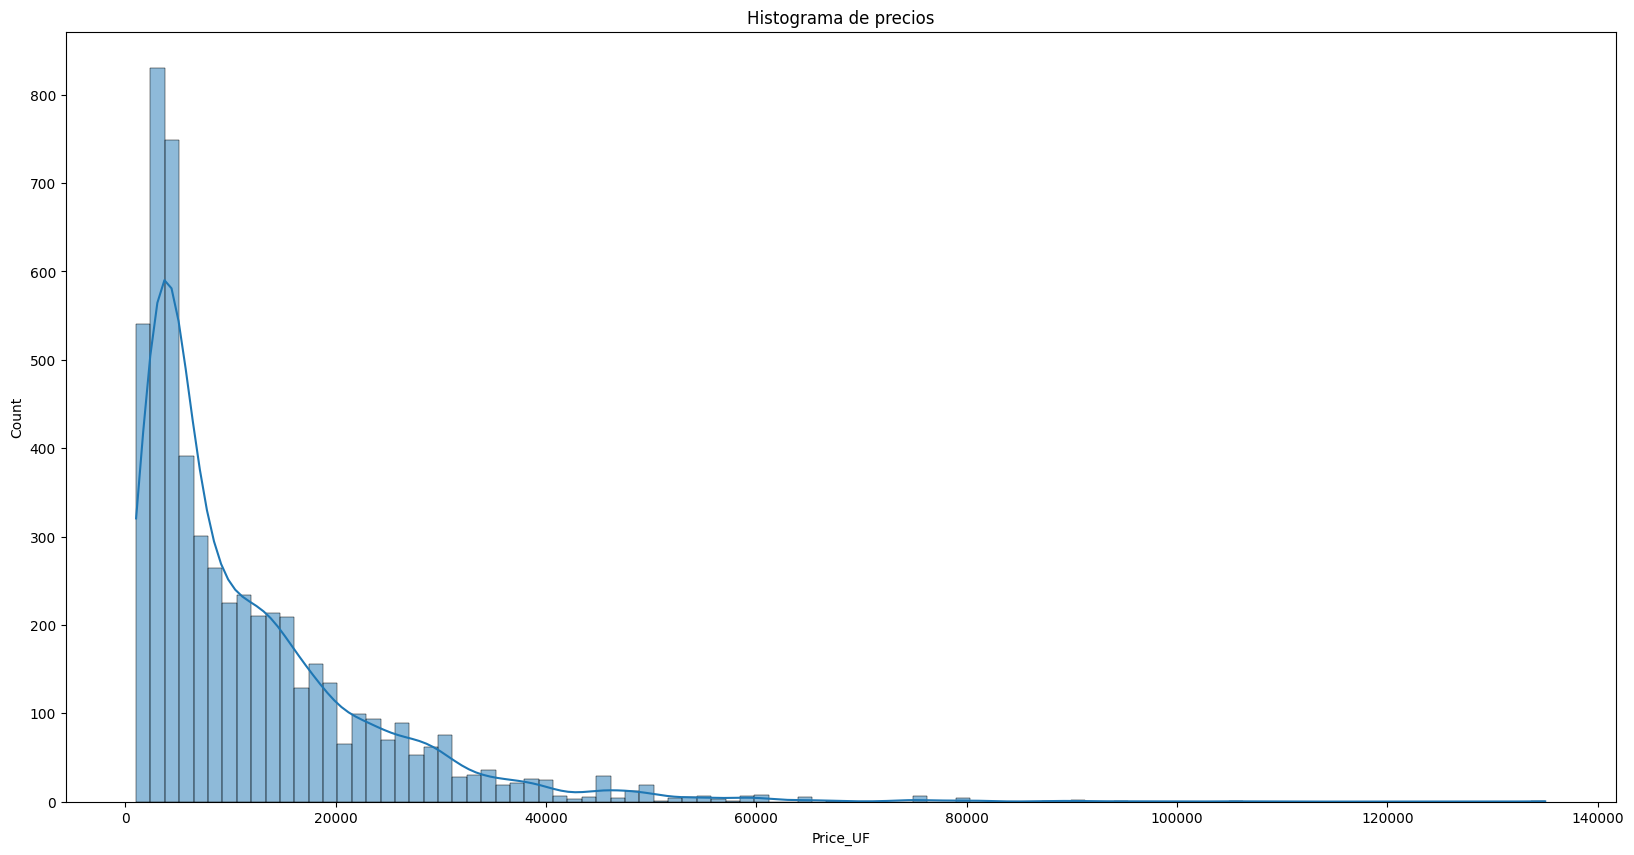

In [13]:
ax = sns.histplot(data=df, x='Price_UF', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de precios')
ax.set_xlabel('Price_UF');

* Observamos una distribucion asimetrica a la derecha, para trabajar con regresion lineal necesitamos una distribución simetrica.

## Transformación de las variables

Estamos realizando una transformación logarítmica de las variables para obtener una distribución simétrica. La transformación realizada es:


$$log1p = log(1+x)$$

In [14]:
#Creamos el transformador a utilizar

transformador = FunctionTransformer(np.log1p, validate=True) 
df_transformado = transformador.transform(df.select_dtypes(exclude=['object']))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [15]:
# Ahora tenemos un df con los valores transfromados pero sin variables tipo 'Object',
# por lo cual tenemos que concatenar un nuevo df para incluirlas.

columnas_df_transformados = df.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([df.select_dtypes(include=['object']), pd.DataFrame(df_transformado, columns=columnas_df_transformados)], axis=1)
df_transformado.head()

,Comuna,Price_UF,Dorms,Baths,Built Area,Total Area,Parking
0,Lampa,8.188967,1.386294,1.098612,4.234107,5.402677,0.693147
1,PuenteAlto,8.475538,1.609438,1.386294,4.510860,5.209486,1.386294
2,Buin,8.229778,1.386294,1.098612,4.454347,5.170484,0.693147
3,QuintaNormal,8.595265,1.386294,1.386294,4.875197,5.998937,0.693147
4,Peñaflor,8.294300,1.386294,1.386294,4.442651,5.198497,1.386294


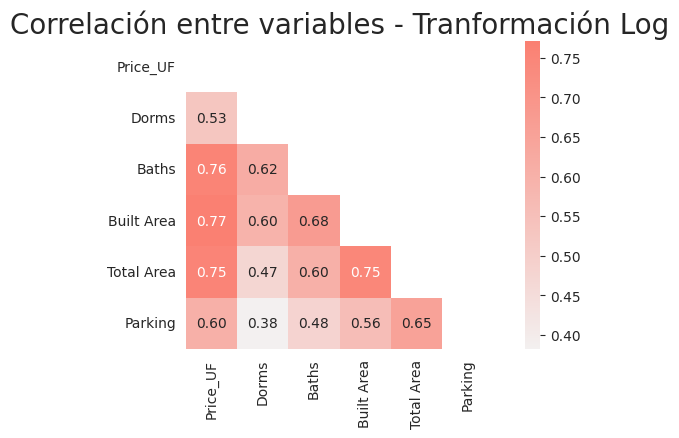

In [16]:
# Observamos los grficos despues de la transformación
correlacion_transformada = df_transformado.drop(columns=['Comuna']).corr()
mask = np.triu(correlacion_transformada)

with sns.axes_style("white"):
    plt.figure(figsize=(8, 4))
    ax = sns.heatmap(correlacion_transformada, cmap=colores, mask=mask, square=True, annot=True, fmt='.2f')
    ax.set_title('Correlación entre variables - Tranformación Log', fontsize=20)

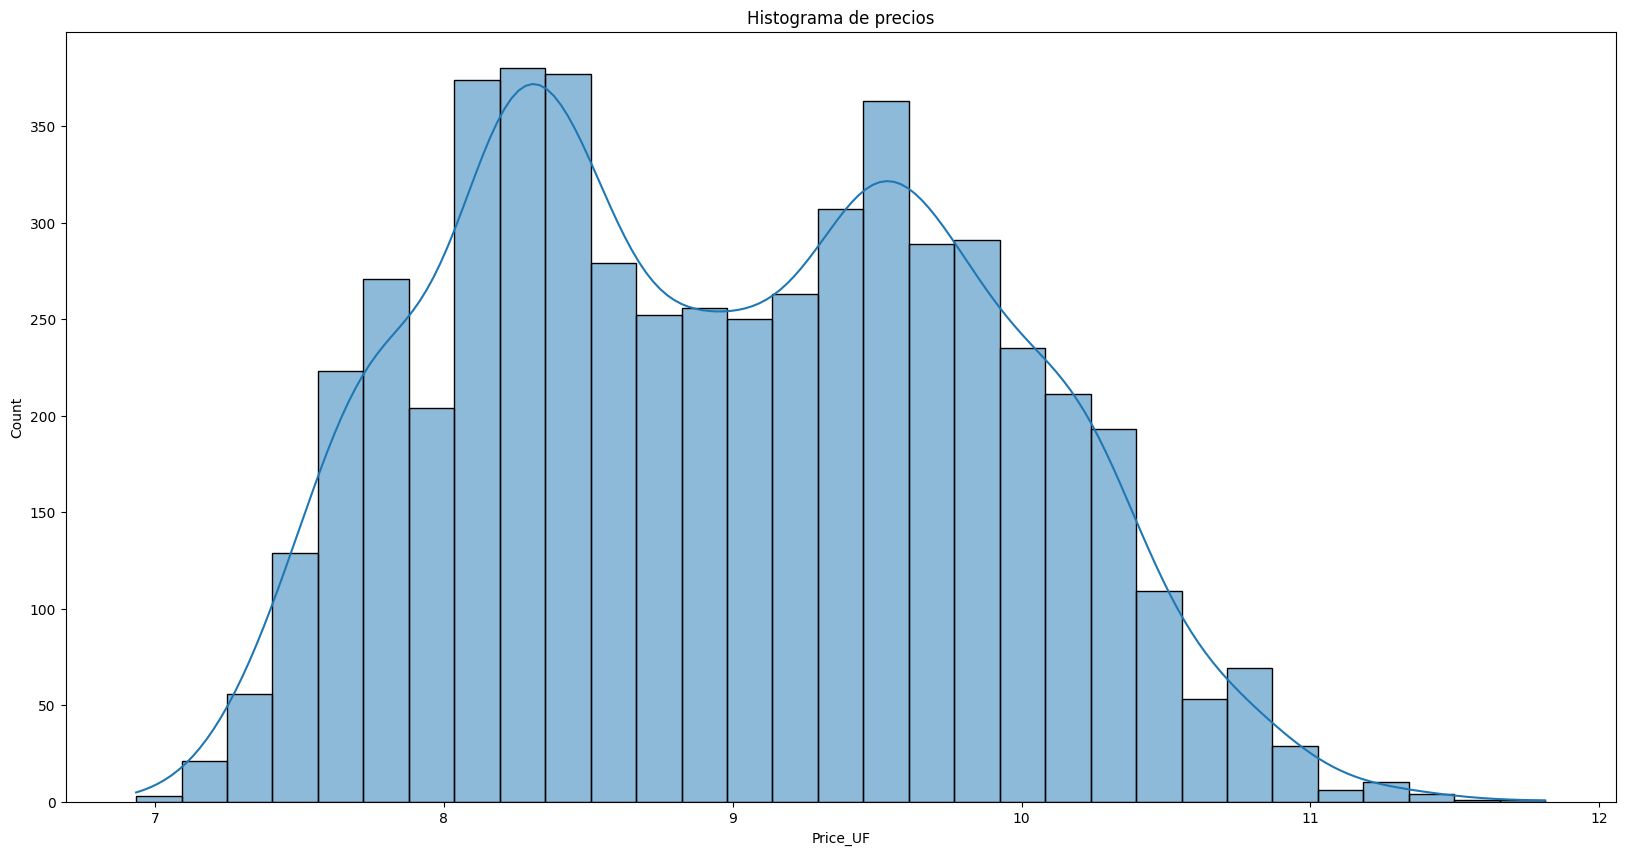

In [17]:
# Después (distribución simétrica)
ax = sns.histplot(data=df_transformado, x='Price_UF', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de precios')
ax.set_xlabel('Price_UF');

## Dummies

#### Como sabemos, el modelo de regresión lineal trabaja mejor con datos numericos, por lo cual tendremos que encargarnos de las variables categoricas transformandolas a numericas.

In [18]:
variables_categoricas = df_transformado.select_dtypes(include=['object']).columns
variables_categoricas

Index(['Comuna'], dtype='object')

In [19]:
df_dummies = pd.get_dummies(df_transformado[variables_categoricas])
df_dummies.head()

,Comuna_Buin,Comuna_CaleradeTango,Comuna_Cerrillos,Comuna_CerroNavia,Comuna_Colina,Comuna_Conchalí,Comuna_Curacaví,Comuna_ElBosque,Comuna_ElMonte,Comuna_EstaciónCentral,...,Comuna_SanBernardo,Comuna_SanJoaquín,Comuna_SanJosédeMaipo,Comuna_SanMiguel,Comuna_SanRamón,Comuna_Santiago,Comuna_Talagante,Comuna_Tiltil,Comuna_Vitacura,Comuna_Ñuñoa
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Ahora que tenemos las variables categoricas transformadas
# solo queda concatenarlas en un df final.

df_final = pd.concat([df_transformado.drop(variables_categoricas, axis=1), df_dummies], axis=1)
df_final.head()

,Price_UF,Dorms,Baths,Built Area,Total Area,Parking,Comuna_Buin,Comuna_CaleradeTango,Comuna_Cerrillos,Comuna_CerroNavia,...,Comuna_SanBernardo,Comuna_SanJoaquín,Comuna_SanJosédeMaipo,Comuna_SanMiguel,Comuna_SanRamón,Comuna_Santiago,Comuna_Talagante,Comuna_Tiltil,Comuna_Vitacura,Comuna_Ñuñoa
0,8.188967,1.386294,1.098612,4.234107,5.402677,0.693147,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8.475538,1.609438,1.386294,4.510860,5.209486,1.386294,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8.229778,1.386294,1.098612,4.454347,5.170484,0.693147,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8.595265,1.386294,1.386294,4.875197,5.998937,0.693147,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.294300,1.386294,1.386294,4.442651,5.198497,1.386294,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Regresión Lineal

### División de los datos

In [21]:
#Variables independientes
x = df_final.drop('Price_UF', axis=1)

#Variables dependientes
y = df_final['Price_UF']

In [22]:
#división en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
#Iniciamos el modelo
lr = LinearRegression()

In [24]:
#Entrenamos el modelo
lr.fit(x_train, y_train)

LinearRegression()

In [25]:
#Prueba
prediccion_lr = lr.predict(x_test)

In [26]:
# Resultados de la predicción
prediccion_lr

array([10.61828613,  8.91146851,  8.77075195, ...,  9.81628418,
        8.82516479,  9.28707886])

In [27]:
# Realizamos la transformación inversa para obtener el valor original
np.expm1(10.62030029)

40956.91233374387

## Metrica de desempeño

* Averiguaremos qué tan “bien” se ajusta una línea de regresión muestral a los datos con el coeficiente de determinacion r2.
* Este encuentra entre 0 y 1, mientras mas cercano a 1 mejor. Desde 0,7 hacia arriba se considera aceptable.

In [28]:
r2_lr = r2_score(y_test, prediccion_lr)
r2_lr

0.8903601634407496

## Arbol de Decisión para Regresión

In [29]:
#Inicializando el modelo
dtr = DecisionTreeRegressor(random_state=42, max_depth=5)

In [30]:
#Entrenamiento
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [31]:
#Prueba
prediccion_dtr = dtr.predict(x_test)

In [32]:
#Resultados de la predicción
prediccion_dtr

array([10.13498357,  8.78998384,  9.40031547, ...,  9.79420558,
        8.78998384,  9.40031547])

**Gráfico de error de predicción:** Un gráfico de error de predicción muestra los objetivos reales frente a los valores predichos. En un modelo perfecto, estos puntos estarían alineados a 45 grados.

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


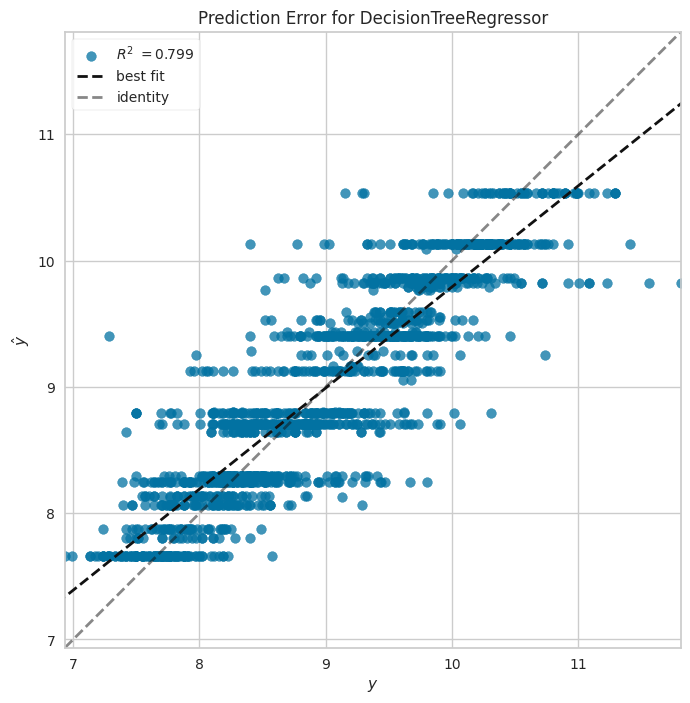

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [33]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(8, 8))
pev = PredictionError(dtr)
pev.fit(x_train, y_train)
pev.score(x_test, y_test)
pev.poof()

## Predicción con Random Forest

In [34]:
#Primero creamos la variable
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [35]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [36]:
prediccion_rf = rf.predict(x_test)

### Grafico de error de predicción

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


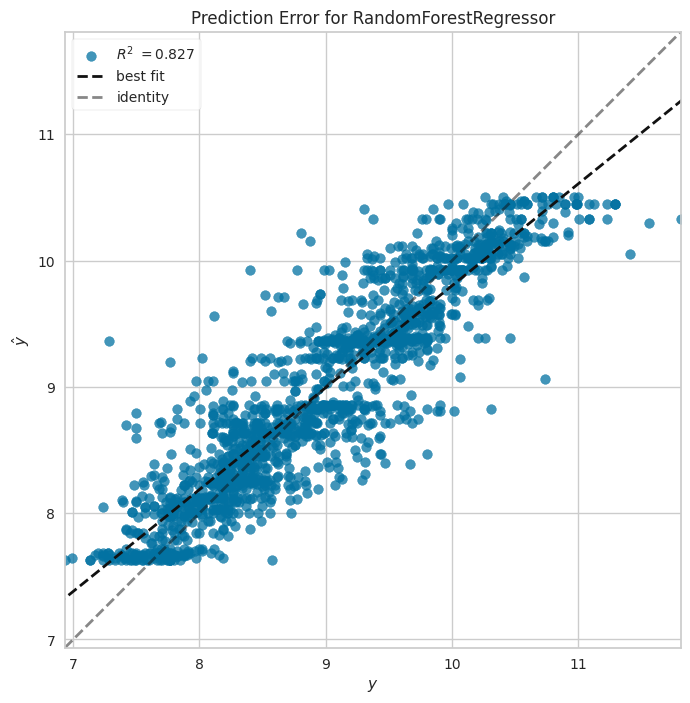

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
pev = PredictionError(rf)
pev.fit(x_train, y_train)
pev.score(x_test, y_test)
pev.poof()

*Como podemos observar, nos da un R2 de 0.83*

## Optimización del Arbol de Decisión

### Cross Validation

In [38]:
from sklearn.model_selection import KFold

#definimos el numero de subconjuntos
cv = KFold(n_splits=5, shuffle=True)

In [39]:
from sklearn.model_selection import cross_val_score

accuracy_cross_val_r2 = cross_val_score(estimator = dtr,
                                       X = x_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
print('Accuracy promedio de r2: {}'.format(round(accuracy_cross_val_r2.mean(), 3)))

Accuracy promedio de r2: 0.8


### Random Search Validation

In [40]:
from sklearn.model_selection import RandomizedSearchCV

#Selección de hiperparametros
param_random_dt = {'criterion': ['squared_error', 'absolute_error'],
                  'max_depth': [6, 8, 10, 12, 14, 16],
                   'min_samples_leaf': [6, 8, 10],
                   'min_samples_split': [8, 10, 12, 14, 16],
                   'max_features': [None, 'sqrt', 'log2'],
                  }

In [41]:
random_cv_dt = RandomizedSearchCV(
    dtr,
    param_random_dt,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

In [42]:
randomcv_dtr = random_cv_dt.fit(x_train, y_train)

In [43]:
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033310,0.014837,0.005878,0.004186,8,6,None,10,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 6...",0.838786,0.846063,0.829500,0.840149,0.820086,0.834917,0.009120,1
1,0.139480,0.016114,0.004176,0.000843,8,10,log2,14,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 1...",0.611981,0.773426,0.701315,0.788497,0.755549,0.726154,0.064246,5
2,0.203763,0.008099,0.003799,0.000079,8,8,sqrt,12,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 8...",0.771845,0.817167,0.776805,0.798874,0.773036,0.787545,0.017766,3
3,0.193717,0.020812,0.003716,0.000629,14,6,sqrt,16,absolute_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.796437,0.813851,0.791972,0.821984,0.784951,0.801839,0.013870,2
4,0.007110,0.001934,0.003042,0.000446,12,10,log2,6,squared_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.699970,0.743543,0.747704,0.730776,0.720619,0.728523,0.017183,4


In [44]:
#la mejor combinación
randomcv_dtr.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'squared_error'}

In [45]:
#el mejor score
randomcv_dtr.best_score_

0.8349169228038308

### Random Search Test

In [46]:
dtr_optimizado = DecisionTreeRegressor(min_samples_split = 16,
 min_samples_leaf = 8,
 max_features = None,
 max_depth = 10,
 criterion= 'squared_error')

In [47]:
dtr_optimizado.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=16)

In [48]:
prediccion_dtr_optimizado = dtr_optimizado.predict(x_test)

In [49]:
r2_score(y_test, prediccion_dtr_optimizado)

0.8357252109605358